# 3d plotting function.

In [1]:
import numpy as np

import gzip
import netCDF4 as nc
import pickle

import matplotlib.pyplot as plt
import matplotlib


import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point


from icosahedron import Icosahedron, rand_rotation_icosahedron, rand_rotation_matrix, plot_voronoi, plot_voronoi_charts

In [11]:
ds1 = nc.Dataset("Datasets_old/iHadCM3/Interpolated/oro_yearly_r_5_nbs_6_cons1.nc")
ds2 = nc.Dataset("Datasets_old/iHadCM3/Interpolated/oro_yearly_r_5_nbs_5_cons1.nc")
t = {}
t["6_nb"] = ds1.variables["prec"][:].data.squeeze()
t["5_nb"] = ds2.variables["prec"][:].data.squeeze()

FileNotFoundError: [Errno 2] No such file or directory: b'Datasets_old/iHadCM3/Interpolated/oro_yearly_r_5_nbs_6_cons1.nc'

In [3]:
ds2.variables["prec"][:].data.shape

(1000, 1, 10)

In [4]:
ico = Icosahedron(r=5)
regions, vertices = ico.get_voronoi_regions_vertices()
charts = ico.get_charts_cut()
indices_six_nb = []
indices_five_nb = []
for i in range(len(regions)):
    if len(regions[i])>5:
        indices_six_nb.append(i)
    else:
        indices_five_nb.append(i)
# create numpy arrays
indices_six_nb = np.array(indices_six_nb)
indices_five_nb = np.array(indices_five_nb)

In [5]:
def combine_datasets(dataset_dict, indices_five_nb, indices_six_nb):
    """
    We need to combine the datasets from the seperate files for points with 5 nbs and points with 6 nbs.
    If there only is a file with six-neighbor points, we fill with zeros. 
    """
    assert "6_nb" in dataset_dict.keys()
    combined_data = np.zeros(dataset_dict["6_nb"].shape[:-1] + (dataset_dict["6_nb"].shape[-1]+10,))
    if "5_nb" in dataset_dict.keys():
        combined_data[:,indices_six_nb] = dataset_dict["6_nb"]
        combined_data[:,indices_five_nb] = dataset_dict["5_nb"]
    else:
        combined_data[:,indices_six_nb] = dataset_dict["6_nb"]
        combined_data[:,indices_five_nb] = 0
    return combined_data

In [6]:
t_c = combine_datasets(t, indices_five_nb, indices_six_nb)

In [8]:
from plotting import plot_map_3d, tsurf_style, prec_style, oro_style
import matplotlib.pyplot as plt

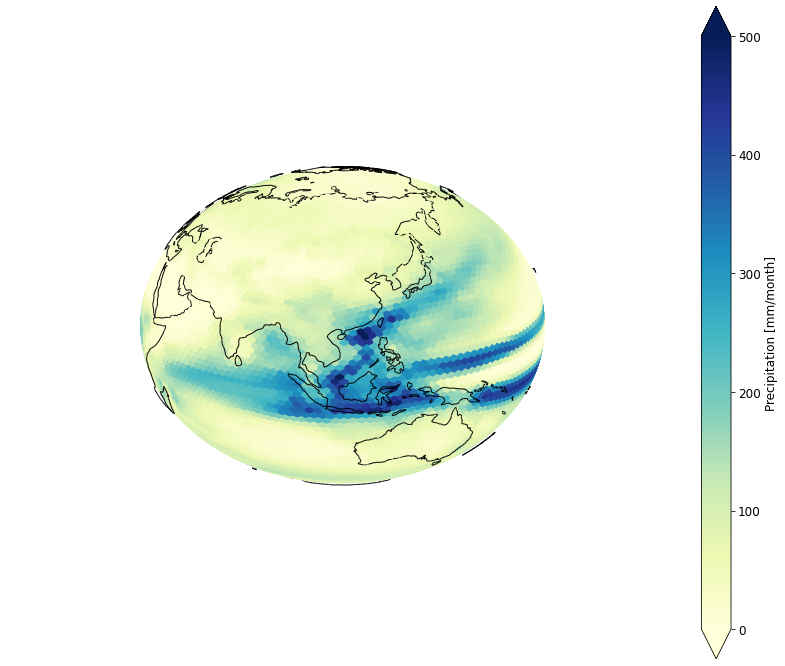

In [9]:
fig = plt.figure(figsize=tsurf_style["FIGSIZE"])

ax= fig.add_subplot(1,1,1, projection='3d')

plot_map_3d(ax, t_c[0,:], {"RESOLUTION": 5}, prec_style,azim=110)

plt.axis("off")
plt.show()